In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

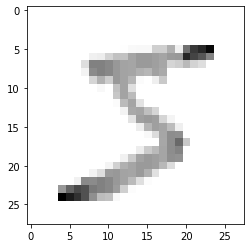

In [13]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1073 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0739 - accuracy: 0.9761


In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0910 - accuracy: 0.9720
0.09099619090557098 0.972000002861023


In [17]:
model.save("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [18]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

In [27]:
predictions = new_model.predict([x_test])

In [28]:
print(np.argmax(preictions[0]))

7


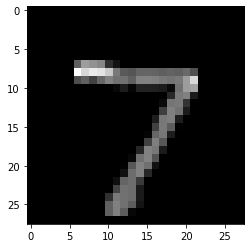

In [29]:
plt.imshow(x_test[0], cmap="gray")
plt.show()

In [34]:
print(predictions.shape)
print(predictions[1])

(10000, 10)
[3.85683521e-08 8.56778701e-04 9.99135673e-01 5.62197374e-06
 5.26897914e-10 1.16916215e-06 8.34064110e-07 2.52433141e-09
 1.13947385e-08 1.04007344e-10]


# Kaggle Cats and Dog classification

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from random import shuffle
import pickle

In [3]:
DATADIR = "/disk2/Assigment/Semester_4/Internship/tuts/training set/CatAndDog"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = 50

In [4]:
def create_traning_data(training_data: list):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
            if img_array is not None:
                img_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])

In [5]:
training_data = []
create_traning_data(training_data)

In [20]:
shuffle(training_data)

In [21]:
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [23]:
pickle_in = open("X.pickle", 'rb')
X = pickle.load(pickle_in)